# Template for specifiying the experimental design.

The compounds, number of doses and information about the role of each compound (treatment, negative control etc) is defined in the file "compound_list.tsv". The scripts below take this tsv file as input in order to design the layout on the plate.

The size of the plate has to be provided as number of rows and columns. The number of replicates and the plate barcode are also provided in the block of code below.

## Design of the experiment and treatment layout (protocol 1)

In [1]:
import datarail.experimental_design.process_assay as process_assay
import datarail.experimental_design.designer as designer
import datarail.experimental_design.plot_panels as design_plot
import matplotlib.pyplot as plt
%matplotlib inline

input_file = 'INPUT/compound_list.tsv'
plate_dims = [16, 24]
fingerprint_prefix = 'DRUG_TRT_'
num_replicates = 3

treatment_dicts = process_assay.read_input(input_file, plate_dims,
                             fingerprint_prefix, encode_plate=True,
                             num_replicates=num_replicates)


There are 20 untreated wells on the inner plate. Consider alloting more wells to negative controls


/Users/mah47/Dropbox (HMS-LSP)/GitHub/datarail/datarail/experimental_design/process_assay.py:113: UserWarning: Plate will have untreated inner wells
  'Plate will have untreated inner wells')


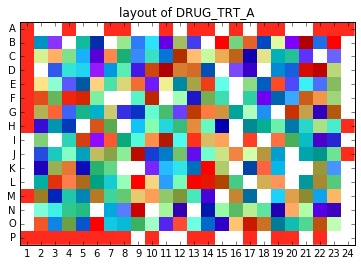

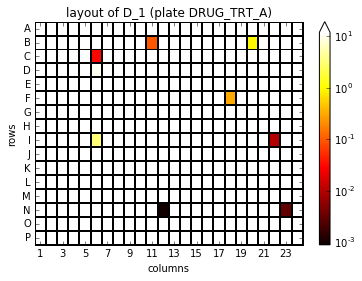

In [2]:
Designs = designer.make_layout(treatment_dicts, fingerprint_prefix,
                      encode_fingerprint=True,
                      plate_dims=plate_dims, num_replicates=num_replicates,
                      randomize=True, biased_randomization=True)

design_plot.plot_layout(Designs.sel(plates='DRUG_TRT_A'))
design_plot.plot_drug(Designs.sel(plates='DRUG_TRT_A'), 'D_1')